# **Assignment 2 Part 2: Covid 19 Cases** 

*Hesham El Alamy 900212051*

# **Part 2: Covid-19 Cases**

### Abstract

This notebook shed's the light on the covid-19 virus' effect on various countries and regions around the world. The Data used in this notebook is a dataset that includes records of countries affected by the COVID-19 pandemic in 2020 and 2021. The notebook includes analysis of such records by obtaining confidence intervals, averages, and graphs for all data analyzed

*In this Notebook, the following will be extenisvely analyzed:*
1- Complex Analysis of Covid Cases in italy: Confirmed cases and Reported Deaths <br>
2- Comparison between Covid Cases and Deaths in Italy in 2020 and 2021 <br>
3- Comparison between Europe and Central Asia and Middle East Regions covid cases in 2020 vs 2021 <br>
4- Comparison between upper-middle income countries and lower-middle income countries covid cases in 2020 vs 2021 <br>
5- Comparison between Africa and Europe Continents in terms of covid cases in 2020 vs 2021 <br>

It was generally concluded that 2021 had struck the world in a more agressive way than 2020 in terms of covid cases and deaths. 

**Preparing Data for Manipulation**

In [2]:
import scipy
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
import scipy.stats 
from scipy.stats import norm,t
!pip3 install livewires

In [3]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [4]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [5]:
df['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua & Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia & Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', 'Côte d\x92Ivoire', 'Cameroon',
       'Congo - Kinshasa', 'Congo - Brazzaville', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
       'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', '

In [6]:
from pandas.api.types import CategoricalDtype
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

In [7]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

## **Complex analysis of Covid Cases in Italy**

In [8]:
dfit=df[df['country']=='Italy']

*Analysis of the daily reported number of cases*

In [9]:
statsit=dfit.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

In [10]:
statsit

dcases                   
                  mean           std size
weekdays                                 
Fri       10791.336634  17091.397197  101
Sat        9143.490000  10464.409571  100
Sun        7825.990000   8384.702907  100
Mon        5823.940000   6792.823020  100
Tue        7834.880000  10663.598595  100
Wed        9323.480000  12612.832742  100
Thu       10407.280000  15423.978486  100

In [11]:
statsit.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [12]:
statsit.columns

MultiIndex([('dcases', 'mean'),
            ('dcases',  'std'),
            ('dcases', 'size')],
           )

In [13]:
statsit.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [14]:
ci95_hi = []
ci95_lo = []

In [15]:
for i in statsit.index:
    m, s, n = statsit.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [16]:
ci95_hi

[14182.22115859872,
 11230.316233544876,
 9498.078412469755,
 7178.573644847766,
 9961.428769081687,
 11838.74759022996,
 13483.149948787212]

In [17]:
ci95_lo

[7400.452108728011,
 7056.663766455124,
 6153.901587530245,
 4469.306355152233,
 5708.331230918313,
 6808.21240977004,
 7331.41005121279]

In [18]:
statsit['ci95_hi'] = ci95_hi
statsit['ci95_lo'] = ci95_lo
print(statsit)

                dcases                          ci95_hi      ci95_lo
                  mean           std size                           
weekdays                                                            
Fri       10791.336634  17091.397197  101  14182.221159  7400.452109
Sat        9143.490000  10464.409571  100  11230.316234  7056.663766
Sun        7825.990000   8384.702907  100   9498.078412  6153.901588
Mon        5823.940000   6792.823020  100   7178.573645  4469.306355
Tue        7834.880000  10663.598595  100   9961.428769  5708.331231
Wed        9323.480000  12612.832742  100  11838.747590  6808.212410
Thu       10407.280000  15423.978486  100  13483.149949  7331.410051


In [19]:
df_ci= pd.DataFrame(statsit)

In [20]:
df_ci

dcases                          ci95_hi      ci95_lo
                  mean           std size                           
weekdays                                                            
Fri       10791.336634  17091.397197  101  14182.221159  7400.452109
Sat        9143.490000  10464.409571  100  11230.316234  7056.663766
Sun        7825.990000   8384.702907  100   9498.078412  6153.901588
Mon        5823.940000   6792.823020  100   7178.573645  4469.306355
Tue        7834.880000  10663.598595  100   9961.428769  5708.331231
Wed        9323.480000  12612.832742  100  11838.747590  6808.212410
Thu       10407.280000  15423.978486  100  13483.149949  7331.410051

In [21]:
df_ci.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [22]:
df_ci['weekdays']=df_ci.index

In [23]:
df_ci

dcases                          ci95_hi      ci95_lo weekdays
                  mean           std size                                    
weekdays                                                                     
Fri       10791.336634  17091.397197  101  14182.221159  7400.452109      Fri
Sat        9143.490000  10464.409571  100  11230.316234  7056.663766      Sat
Sun        7825.990000   8384.702907  100   9498.078412  6153.901588      Sun
Mon        5823.940000   6792.823020  100   7178.573645  4469.306355      Mon
Tue        7834.880000  10663.598595  100   9961.428769  5708.331231      Tue
Wed        9323.480000  12612.832742  100  11838.747590  6808.212410      Wed
Thu       10407.280000  15423.978486  100  13483.149949  7331.410051      Thu

In [24]:
df_ci.columns

MultiIndex([(  'dcases', 'mean'),
            (  'dcases',  'std'),
            (  'dcases', 'size'),
            ( 'ci95_hi',     ''),
            ( 'ci95_lo',     ''),
            ('weekdays',     '')],
           )

([<matplotlib.axis.YTick at 0x1cfbc892fd0>,
 [Text(0, 0, 'Fri'),
  Text(0, 1, 'Sat'),
  Text(0, 2, 'Sun'),
  Text(0, 3, 'Mon'),
  Text(0, 4, 'Tue'),
  Text(0, 5, 'Wed'),
  Text(0, 6, 'Thu')])

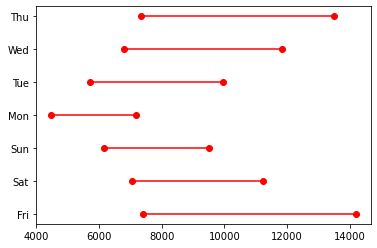

In [25]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['weekdays']))

*As seen in the graph, Thursday has a very wide conifdence interval, which means that the data collected for covid-19 cases reported on Thursdays is not reliable and has a high probability of containing erors. On the other hand, Data collected on Wednesdays and Saturdays are the most accurate with the narrowest confidence intervals.*

In [26]:
statsit

dcases                          ci95_hi      ci95_lo weekdays
                  mean           std size                                    
weekdays                                                                     
Fri       10791.336634  17091.397197  101  14182.221159  7400.452109      Fri
Sat        9143.490000  10464.409571  100  11230.316234  7056.663766      Sat
Sun        7825.990000   8384.702907  100   9498.078412  6153.901588      Sun
Mon        5823.940000   6792.823020  100   7178.573645  4469.306355      Mon
Tue        7834.880000  10663.598595  100   9961.428769  5708.331231      Tue
Wed        9323.480000  12612.832742  100  11838.747590  6808.212410      Wed
Thu       10407.280000  15423.978486  100  13483.149949  7331.410051      Thu

In [27]:
statsit.columns

MultiIndex([(  'dcases', 'mean'),
            (  'dcases',  'std'),
            (  'dcases', 'size'),
            ( 'ci95_hi',     ''),
            ( 'ci95_lo',     ''),
            ('weekdays',     '')],
           )

In [28]:
statsit.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [29]:
statsit['weekdays']=statsit.index

In [30]:
statsit.columns=['mean','std','size','ci95_hi','ci95_lo','weekdays']

In [31]:
statsit.columns

Index(['mean', 'std', 'size', 'ci95_hi', 'ci95_lo', 'weekdays'], dtype='object')

In [32]:
statsit

,mean,std,size,ci95_hi,ci95_lo,weekdays
weekdays,,,,,,
Fri,10791.336634,17091.397197,101,14182.221159,7400.452109,Fri
Sat,9143.490000,10464.409571,100,11230.316234,7056.663766,Sat
Sun,7825.990000,8384.702907,100,9498.078412,6153.901588,Sun
Mon,5823.940000,6792.823020,100,7178.573645,4469.306355,Mon
Tue,7834.880000,10663.598595,100,9961.428769,5708.331231,Tue
Wed,9323.480000,12612.832742,100,11838.747590,6808.212410,Wed
Thu,10407.280000,15423.978486,100,13483.149949,7331.410051,Thu


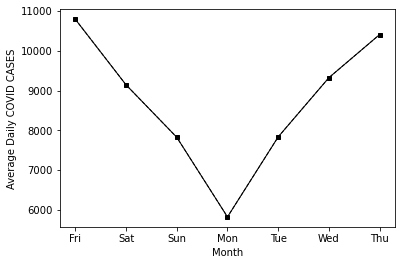

In [33]:
plt.plot( 'weekdays', 'mean', data=statsit, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'weekdays', 'mean', data=statsit, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.show()

*The graph has a V-shaped curve that reflects the average daily covid cases along the 7 days of the week. The highest day that covid cases are reported in is Friday, whereas Monday has the lowest average of reported cases. Monday could be the lowest day of reported cases either due to multiple errors in the data linked to Monday, so close examination of Monday's data is requred. Deeper Analysis about assessing covid-19 based on weekdays will be investigated later in the Discussion Section.*

### **Analysis of the daily number of confirmed death cases in Italy**

In [34]:
statsit2=dfit.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size]})

In [35]:
statsit2

ddeaths                 
                mean         std size
weekdays                             
Fri       209.564356  241.521693  101
Sat       191.150000  219.482328  100
Sun       147.260000  177.204534  100
Mon       172.330000  195.010596  100
Tue       226.910000  250.471035  100
Wed       211.030000  226.916282  100
Thu       213.990000  240.475938  100

In [36]:
statsit2.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [37]:
ci95_hi2 = []
ci95_lo2 = []

In [38]:
for i in statsit2.index:
    m, s, n = statsit2.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi2.append(x[1])
    ci95_lo2.append(x[0])

In [39]:
ci95_hi2

[257.4815724878798,
 234.91945276643628,
 182.59835977479656,
 211.21926786662394,
 276.85926113169245,
 256.2819415585818,
 261.9460258192309]

In [40]:
ci95_lo2

[161.64714038340728,
 147.38054723356373,
 111.92164022520342,
 133.4407321333761,
 176.96073886830754,
 165.77805844141818,
 166.03397418076912]

In [41]:
statsit2['ci95_hi2'] = ci95_hi
statsit2['ci95_lo2'] = ci95_lo
print(statsit2)

             ddeaths                       ci95_hi2     ci95_lo2
                mean         std size                           
weekdays                                                        
Fri       209.564356  241.521693  101  14182.221159  7400.452109
Sat       191.150000  219.482328  100  11230.316234  7056.663766
Sun       147.260000  177.204534  100   9498.078412  6153.901588
Mon       172.330000  195.010596  100   7178.573645  4469.306355
Tue       226.910000  250.471035  100   9961.428769  5708.331231
Wed       211.030000  226.916282  100  11838.747590  6808.212410
Thu       213.990000  240.475938  100  13483.149949  7331.410051


In [42]:
df_ci2= pd.DataFrame(statsit2)

In [43]:
df_ci2

ddeaths                       ci95_hi2     ci95_lo2
                mean         std size                           
weekdays                                                        
Fri       209.564356  241.521693  101  14182.221159  7400.452109
Sat       191.150000  219.482328  100  11230.316234  7056.663766
Sun       147.260000  177.204534  100   9498.078412  6153.901588
Mon       172.330000  195.010596  100   7178.573645  4469.306355
Tue       226.910000  250.471035  100   9961.428769  5708.331231
Wed       211.030000  226.916282  100  11838.747590  6808.212410
Thu       213.990000  240.475938  100  13483.149949  7331.410051

In [44]:
df_ci2= pd.DataFrame(statsit2)

In [45]:
df_ci2['weekdays']=df_ci2.index

In [46]:
df_ci2

ddeaths                       ci95_hi2     ci95_lo2 weekdays
                mean         std size                                    
weekdays                                                                 
Fri       209.564356  241.521693  101  14182.221159  7400.452109      Fri
Sat       191.150000  219.482328  100  11230.316234  7056.663766      Sat
Sun       147.260000  177.204534  100   9498.078412  6153.901588      Sun
Mon       172.330000  195.010596  100   7178.573645  4469.306355      Mon
Tue       226.910000  250.471035  100   9961.428769  5708.331231      Tue
Wed       211.030000  226.916282  100  11838.747590  6808.212410      Wed
Thu       213.990000  240.475938  100  13483.149949  7331.410051      Thu

In [47]:
df_ci2.columns

MultiIndex([( 'ddeaths', 'mean'),
            ( 'ddeaths',  'std'),
            ( 'ddeaths', 'size'),
            ('ci95_hi2',     ''),
            ('ci95_lo2',     ''),
            ('weekdays',     '')],
           )

([<matplotlib.axis.YTick at 0x1cfbd1472b0>,
 [Text(0, 0, 'Fri'),
  Text(0, 1, 'Sat'),
  Text(0, 2, 'Sun'),
  Text(0, 3, 'Mon'),
  Text(0, 4, 'Tue'),
  Text(0, 5, 'Wed'),
  Text(0, 6, 'Thu')])

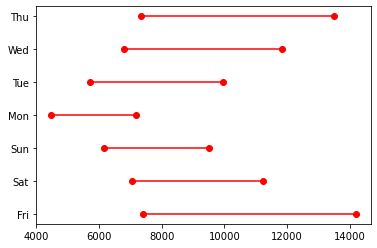

In [48]:
for lb,ub,y in zip(df_ci2['ci95_lo2'],df_ci2['ci95_hi2'],range(len(df_ci2))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci2)),list(df_ci2['weekdays']))

*Similar to what was observed above, Thursday has a widest confidence interval whereas Wednesday has the narrowest. This graph increases the probability that the data of Thursday has several errors which reflected on having a very wide confidence interval.*

In [49]:
statsit2

ddeaths                       ci95_hi2     ci95_lo2 weekdays
                mean         std size                                    
weekdays                                                                 
Fri       209.564356  241.521693  101  14182.221159  7400.452109      Fri
Sat       191.150000  219.482328  100  11230.316234  7056.663766      Sat
Sun       147.260000  177.204534  100   9498.078412  6153.901588      Sun
Mon       172.330000  195.010596  100   7178.573645  4469.306355      Mon
Tue       226.910000  250.471035  100   9961.428769  5708.331231      Tue
Wed       211.030000  226.916282  100  11838.747590  6808.212410      Wed
Thu       213.990000  240.475938  100  13483.149949  7331.410051      Thu

In [50]:
statsit2.columns

MultiIndex([( 'ddeaths', 'mean'),
            ( 'ddeaths',  'std'),
            ( 'ddeaths', 'size'),
            ('ci95_hi2',     ''),
            ('ci95_lo2',     ''),
            ('weekdays',     '')],
           )

In [51]:
statsit2.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [52]:
statsit2.columns=['mean','std','size','ci95_hi2','ci95_lo2','weekdays']

In [53]:
statsit2['weekdays']=statsit2.index

In [54]:
statsit2

,mean,std,size,ci95_hi2,ci95_lo2,weekdays
weekdays,,,,,,
Fri,209.564356,241.521693,101,14182.221159,7400.452109,Fri
Sat,191.150000,219.482328,100,11230.316234,7056.663766,Sat
Sun,147.260000,177.204534,100,9498.078412,6153.901588,Sun
Mon,172.330000,195.010596,100,7178.573645,4469.306355,Mon
Tue,226.910000,250.471035,100,9961.428769,5708.331231,Tue
Wed,211.030000,226.916282,100,11838.747590,6808.212410,Wed
Thu,213.990000,240.475938,100,13483.149949,7331.410051,Thu


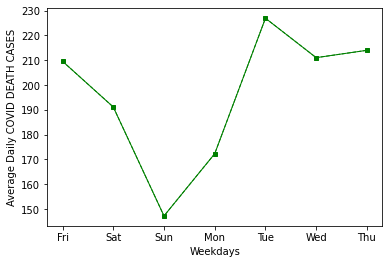

In [55]:
plt.plot( 'weekdays', 'mean', data=statsit2, marker='s', color='green', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'weekdays', 'mean', data=statsit2, marker='o', color='green',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Weekdays")
plt.ylabel("Average Daily COVID DEATH CASES")
plt.show()

*Dissimilar to the confirmed covid cases graph, the average daily death cases graph is not v shaped and is more abstract. Sunday has the lowest average of the 7 days with approx. 147 cases whereas Tuesday has the highest average with 226 death cases. There is a huge difference between Monday's cases and Tuesday's cases which will need further investigation to comprehend. Although Friday had the largest number of confirmed cases, it doesn't have the highest number of deaths*

### **Comparison between Covid Cases and Deaths in Italy in 2020 and 2021**

*comparison of Number of Cases*

In [56]:
df['date'][0]

'2020-02-24'

In [57]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df['date'][0]

Timestamp('2020-02-24 00:00:00')

In [58]:
df['year'] = pd. DatetimeIndex(df['date']). year

In [59]:
df['year'][0]

2020

In [60]:
def ci_lb2(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [61]:
x=df['dcases']

In [62]:
ci_lb2(x)

2285.1835480837417

In [63]:
def ci_ub2(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [64]:
ci_ub2(x)

2422.2624439548763

In [65]:
statsdcases=df.groupby(['country','year','month']).agg({"dcases": [np.mean, np.std, np.size,ci_ub2,ci_lb2]})

In [66]:
statsdcases

dcases                                  \
                               mean          std  size       ci_ub2   
country     year month                                                
Afghanistan 2020 Jan            NaN          NaN   NaN          NaN   
                 Feb       0.833333     2.041241   6.0     2.975485   
                 Mar       5.258065    10.871883  31.0     9.245904   
                 Apr      55.366667    40.385627  30.0    70.446908   
                 May     430.741935   266.692078  31.0   528.565379   
...                             ...          ...   ...          ...   
Zimbabwe    2021 Aug     513.322581   386.841948  31.0   655.217353   
                 Sep     201.566667   135.119789  30.0   252.021225   
                 Oct      69.580645    58.035492  31.0    90.868235   
                 Nov      54.933333    82.622087  30.0    85.784928   
                 Dec    2536.548387  2572.199964  31.0  3480.038951   

                                     
                             ci_lb2  
country     year month               
Afghanistan 2020 Jan            NaN  
                 Feb      -1.308818  
                 Mar       1.270225  
                 Apr      40.286426  
                 May     332.918491  
...                             ...  
Zimbabwe    2021 Aug     371.427809  
                 Sep     151.112108  
                 Oct      48.293055  
                 Nov      24.081739  
                 Dec    1593.057823  

[4488 rows x 5 columns]

In [67]:
statsdcases=statsdcases.reset_index()

In [68]:
statsdcases

country  year month       dcases                                  \
                                      mean          std  size       ci_ub2   
0     Afghanistan  2020   Jan          NaN          NaN   NaN          NaN   
1     Afghanistan  2020   Feb     0.833333     2.041241   6.0     2.975485   
2     Afghanistan  2020   Mar     5.258065    10.871883  31.0     9.245904   
3     Afghanistan  2020   Apr    55.366667    40.385627  30.0    70.446908   
4     Afghanistan  2020   May   430.741935   266.692078  31.0   528.565379   
...           ...   ...   ...          ...          ...   ...          ...   
4483     Zimbabwe  2021   Aug   513.322581   386.841948  31.0   655.217353   
4484     Zimbabwe  2021   Sep   201.566667   135.119789  30.0   252.021225   
4485     Zimbabwe  2021   Oct    69.580645    58.035492  31.0    90.868235   
4486     Zimbabwe  2021   Nov    54.933333    82.622087  30.0    85.784928   
4487     Zimbabwe  2021   Dec  2536.548387  2572.199964  31.0  3480.038951   

                   
           ci_lb2  
0             NaN  
1       -1.308818  
2        1.270225  
3       40.286426  
4      332.918491  
...           ...  
4483   371.427809  
4484   151.112108  
4485    48.293055  
4486    24.081739  
4487  1593.057823  

[4488 rows x 8 columns]

In [69]:
statsIT=statsdcases[(statsdcases['country']=='Italy') & (statsdcases['year']==2021)]

In [70]:
statsIT

country  year month        dcases                                    \
                                  mean           std  size        ci_ub2   
1956   Italy  2021   Jan  14382.774194   3339.157825  31.0  15607.587172   
1957   Italy  2021   Feb  13294.035714   3389.570392  28.0  14608.373902   
1958   Italy  2021   Mar  21278.516129   3899.512806  31.0  22708.868974   
1959   Italy  2021   Apr  14591.800000   3747.051148  30.0  15990.971893   
1960   Italy  2021   May   6295.741935   2932.354708  31.0   7371.338326   
1961   Italy  2021   Jun   1402.933333    714.902884  30.0   1669.882457   
1962   Italy  2021   Jul   2907.064516   1958.244110  31.0   3625.354255   
1963   Italy  2021   Aug   6127.838710   1273.881499  31.0   6595.102216   
1964   Italy  2021   Sep   4412.133333   1295.630608  30.0   4895.929753   
1965   Italy  2021   Oct   3213.225806    977.378593  31.0   3571.731169   
1966   Italy  2021   Nov   8552.733333   3136.827092  30.0   9724.043819   
1967   Italy  2021   Dec  35391.483871  33089.221108  31.0  47528.708162   

                    
            ci_lb2  
1956  13157.961215  
1957  11979.697526  
1958  19848.163284  
1959  13192.628107  
1960   5220.145545  
1961   1135.984209  
1962   2188.774777  
1963   5660.575204  
1964   3928.336913  
1965   2854.720444  
1966   7381.422847  
1967  23254.259580

In [71]:
statsIT.columns

MultiIndex([('country',       ''),
            (   'year',       ''),
            (  'month',       ''),
            ( 'dcases',   'mean'),
            ( 'dcases',    'std'),
            ( 'dcases',   'size'),
            ( 'dcases', 'ci_ub2'),
            ( 'dcases', 'ci_lb2')],
           )

In [72]:
statsIT21=statsdcases[(statsdcases['country']=='Italy')
  & (statsdcases['year']==2021)]
statsIT21

country  year month        dcases                                    \
                                  mean           std  size        ci_ub2   
1956   Italy  2021   Jan  14382.774194   3339.157825  31.0  15607.587172   
1957   Italy  2021   Feb  13294.035714   3389.570392  28.0  14608.373902   
1958   Italy  2021   Mar  21278.516129   3899.512806  31.0  22708.868974   
1959   Italy  2021   Apr  14591.800000   3747.051148  30.0  15990.971893   
1960   Italy  2021   May   6295.741935   2932.354708  31.0   7371.338326   
1961   Italy  2021   Jun   1402.933333    714.902884  30.0   1669.882457   
1962   Italy  2021   Jul   2907.064516   1958.244110  31.0   3625.354255   
1963   Italy  2021   Aug   6127.838710   1273.881499  31.0   6595.102216   
1964   Italy  2021   Sep   4412.133333   1295.630608  30.0   4895.929753   
1965   Italy  2021   Oct   3213.225806    977.378593  31.0   3571.731169   
1966   Italy  2021   Nov   8552.733333   3136.827092  30.0   9724.043819   
1967   Italy  2021   Dec  35391.483871  33089.221108  31.0  47528.708162   

                    
            ci_lb2  
1956  13157.961215  
1957  11979.697526  
1958  19848.163284  
1959  13192.628107  
1960   5220.145545  
1961   1135.984209  
1962   2188.774777  
1963   5660.575204  
1964   3928.336913  
1965   2854.720444  
1966   7381.422847  
1967  23254.259580

In [73]:
statsIT20=statsdcases[(statsdcases['country']=='Italy')
  & (statsdcases['year']==2020)]
statsIT20

country  year month        dcases                                   \
                                  mean          std  size        ci_ub2   
1944   Italy  2020   Jan      2.000000          NaN   1.0           NaN   
1945   Italy  2020   Feb     38.827586    73.426868  29.0     66.757673   
1946   Italy  2020   Mar   3376.258065  2050.826207  31.0   4128.507190   
1947   Italy  2020   Apr   3322.366667   934.788174  30.0   3671.422307   
1948   Italy  2020   May    888.193548   436.496233  31.0   1048.301659   
1949   Italy  2020   Jun    257.633333   115.008390  30.0    300.578172   
1950   Italy  2020   Jul    224.483871    62.517662  31.0    247.415535   
1951   Italy  2020   Aug    699.258065   415.082238  31.0    851.511459   
1952   Italy  2020   Sep   1521.566667   247.627596  30.0   1614.032331   
1953   Italy  2020   Oct  11760.290323  8966.383248  31.0  15049.186250   
1954   Italy  2020   Nov  30737.466667  6127.616478  30.0  33025.556263   
1955   Italy  2020   Dec  16310.064516  4159.633878  31.0  17835.830541   

                    
            ci_lb2  
1944           NaN  
1945     10.897499  
1946   2624.008939  
1947   2973.311026  
1948    728.085438  
1949    214.688495  
1950    201.552207  
1951    547.004670  
1952   1429.101003  
1953   8471.394395  
1954  28449.377070  
1955  14784.298492

In [74]:
statsIT20.columns=['country','year','month','mean','std','size','ci_lb2','ci_ub2']

In [75]:
statsIT21.columns=['country','year','month','mean','std','size','ci_lb2','ci_ub2']

In [76]:
x=statsIT20['month']
x

1944    Jan
1945    Feb
1946    Mar
1947    Apr
1948    May
1949    Jun
1950    Jul
1951    Aug
1952    Sep
1953    Oct
1954    Nov
1955    Dec
Name: month, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [77]:
y1=statsIT20['mean']
y1

1944        2.000000
1945       38.827586
1946     3376.258065
1947     3322.366667
1948      888.193548
1949      257.633333
1950      224.483871
1951      699.258065
1952     1521.566667
1953    11760.290323
1954    30737.466667
1955    16310.064516
Name: mean, dtype: float64

In [78]:
y2=statsIT21['mean']
y2

1956    14382.774194
1957    13294.035714
1958    21278.516129
1959    14591.800000
1960     6295.741935
1961     1402.933333
1962     2907.064516
1963     6127.838710
1964     4412.133333
1965     3213.225806
1966     8552.733333
1967    35391.483871
Name: mean, dtype: float64

In [79]:
ci_lb_ub20=[statsIT20['ci_lb2'],statsIT20['ci_ub2']]
err20 = np.abs(ci_lb_ub20 - statsIT20['mean'].to_numpy())

In [80]:
ci_lb_ub21=[statsIT21['ci_lb2'],statsIT21['ci_ub2']]
err21 = np.abs(ci_lb_ub21 - statsIT21['mean'].to_numpy())

In [81]:
from matplotlib.transforms import Affine2D

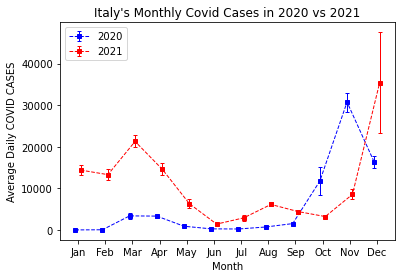

In [82]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err20, data=statsIT20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err21, data=statsIT21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Italy's Monthly Covid Cases in 2020 vs 2021")
plt.show()

*Analyzing the Time Series graph, generally 2021 has higher averages of Daily covid cases in all the months except in October and November than 2020. It can be concluded that Italy suffered more from covid-19 in 2021 than in 2020. Examining the peaks of every year, Covid cases peaked in November during 2020 and peaked in December in 2021. Both Nov 2020 and Dec 2021 have similar Averages, which can indicate that both covid cases peaks in italy were similar in terms of Average Daily Cases.The error bars in the graph are neglibile due to their minimal value in relation to the cases number,however Dec 2021 has very wide error bars that indicate inaccuracy.*

### **Comparison of Deaths in Italy between 2020 and 2021**

In [83]:
def ci_lb3(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [84]:
x=df['ddeaths']

In [85]:
ci_lb3(x)

43.18608989544067

In [86]:
def ci_ub3(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [87]:
ci_ub3(x)

45.399958963672184

In [88]:
statsddeaths=df.groupby(['country','year','month']).agg({"ddeaths": [np.mean, np.std, np.size,ci_ub3,ci_lb3]})

In [89]:
statsddeaths

ddeaths                                       
                             mean        std  size     ci_ub3     ci_lb3
country     year month                                                  
Afghanistan 2020 Jan          NaN        NaN   NaN        NaN        NaN
                 Feb     0.000000   0.000000   6.0   0.000000   0.000000
                 Mar     0.129032   0.427546  31.0   0.285857  -0.027793
                 Apr     1.866667   2.285386  30.0   2.720044   1.013290
                 May     6.258065   5.853590  31.0   8.405179   4.110950
...                           ...        ...   ...        ...        ...
Zimbabwe    2021 Aug    28.612903  17.932610  31.0  35.190638  22.035169
                 Sep     6.800000   5.803685  30.0   8.967132   4.632868
                 Oct     1.774194   1.909794  31.0   2.474712   1.073676
                 Nov     0.966667   1.351457  30.0   1.471309   0.462024
                 Dec     9.580645  12.443939  31.0  14.145119   5.016172

[4488 rows x 5 columns]

In [90]:
statsddeaths=statsddeaths.reset_index()

In [91]:
statsIT2=statsddeaths[(statsddeaths['country']=='Italy') & (statsddeaths['year']==2021)]

In [92]:
statsIT2

country  year month     ddeaths                                          
                                mean         std  size      ci_ub3      ci_lb3
1956   Italy  2021   Jan  463.129032   95.995396  31.0  498.340428  427.917637
1957   Italy  2021   Feb  327.964286   73.830879  28.0  356.592912  299.335660
1958   Italy  2021   Mar  375.709677   81.696672  31.0  405.676259  345.743096
1959   Italy  2021   Apr  382.033333  107.369322  30.0  422.125697  341.940970
1960   Italy  2021   May  171.645161   66.121377  31.0  195.898678  147.391644
1961   Italy  2021   Jun   47.933333   24.041535  30.0   56.910590   38.956077
1962   Italy  2021   Jul   16.032258    7.040283  31.0   18.614655   13.449861
1963   Italy  2021   Aug   37.354839   17.261804  31.0   43.686520   31.023158
1964   Italy  2021   Sep   56.666667   12.009575  30.0   61.151116   52.182218
1965   Italy  2021   Oct   38.032258   11.004496  31.0   42.068740   33.995776
1966   Italy  2021   Nov   57.600000   18.561361  30.0   64.530926   50.669074
1967   Italy  2021   Dec  115.290323   35.367776  31.0  128.263328  102.317318

In [93]:
stats2IT21=statsddeaths[(statsddeaths['country']=='Italy')
  & (statsddeaths['year']==2021)]
stats2IT21

country  year month     ddeaths                                          
                                mean         std  size      ci_ub3      ci_lb3
1956   Italy  2021   Jan  463.129032   95.995396  31.0  498.340428  427.917637
1957   Italy  2021   Feb  327.964286   73.830879  28.0  356.592912  299.335660
1958   Italy  2021   Mar  375.709677   81.696672  31.0  405.676259  345.743096
1959   Italy  2021   Apr  382.033333  107.369322  30.0  422.125697  341.940970
1960   Italy  2021   May  171.645161   66.121377  31.0  195.898678  147.391644
1961   Italy  2021   Jun   47.933333   24.041535  30.0   56.910590   38.956077
1962   Italy  2021   Jul   16.032258    7.040283  31.0   18.614655   13.449861
1963   Italy  2021   Aug   37.354839   17.261804  31.0   43.686520   31.023158
1964   Italy  2021   Sep   56.666667   12.009575  30.0   61.151116   52.182218
1965   Italy  2021   Oct   38.032258   11.004496  31.0   42.068740   33.995776
1966   Italy  2021   Nov   57.600000   18.561361  30.0   64.530926   50.669074
1967   Italy  2021   Dec  115.290323   35.367776  31.0  128.263328  102.317318

In [94]:
stats2IT20=statsddeaths[(statsddeaths['country']=='Italy')
  & (statsddeaths['year']==2020)]
stats2IT20

country  year month     ddeaths                                          
                                mean         std  size      ci_ub3      ci_lb3
1944   Italy  2020   Jan    0.000000         NaN   1.0         NaN         NaN
1945   Italy  2020   Feb    1.000000    1.963961  29.0    1.747051    0.252949
1946   Italy  2020   Mar  399.967742  313.773855  31.0  515.060921  284.874563
1947   Italy  2020   Apr  517.966667  132.823576  30.0  567.563805  468.369528
1948   Italy  2020   May  175.741935   91.021231  31.0  209.128793  142.355078
1949   Italy  2020   Jun   46.100000   24.627361  30.0   55.296008   36.903992
1950   Italy  2020   Jul   12.064516    6.894130  31.0   14.593304    9.535729
1951   Italy  2020   Aug   11.032258   27.449935  31.0   21.100975    0.963541
1952   Italy  2020   Sep   13.700000    5.240097  30.0   15.656685   11.743315
1953   Italy  2020   Oct   87.870968   75.389098  31.0  115.523912   60.218023
1954   Italy  2020   Nov  565.266667  173.229354  30.0  629.951571  500.581763
1955   Italy  2020   Dec  599.451613  167.376390  31.0  660.845768  538.057457

In [95]:
stats2IT20.columns=['country','year','month','mean','std','size','ci_lb3','ci_ub3']

In [96]:
stats2IT21.columns=['country','year','month','mean','std','size','ci_lb3','ci_ub3']

In [97]:
z=statsIT20['month']
z

1944    Jan
1945    Feb
1946    Mar
1947    Apr
1948    May
1949    Jun
1950    Jul
1951    Aug
1952    Sep
1953    Oct
1954    Nov
1955    Dec
Name: month, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [98]:
y3=stats2IT20['mean']
y3

1944      0.000000
1945      1.000000
1946    399.967742
1947    517.966667
1948    175.741935
1949     46.100000
1950     12.064516
1951     11.032258
1952     13.700000
1953     87.870968
1954    565.266667
1955    599.451613
Name: mean, dtype: float64

In [99]:
y4=stats2IT21['mean']
y4

1956    463.129032
1957    327.964286
1958    375.709677
1959    382.033333
1960    171.645161
1961     47.933333
1962     16.032258
1963     37.354839
1964     56.666667
1965     38.032258
1966     57.600000
1967    115.290323
Name: mean, dtype: float64

In [100]:
ci_lb_ub220=[stats2IT20['ci_lb3'],stats2IT20['ci_ub3']]
err220 = np.abs(ci_lb_ub220 - stats2IT20['mean'].to_numpy())

In [101]:
ci_lb_ub221=[statsIT21['ci_lb2'],statsIT21['ci_ub2']]
err21 = np.abs(ci_lb_ub221 - stats2IT21['mean'].to_numpy())

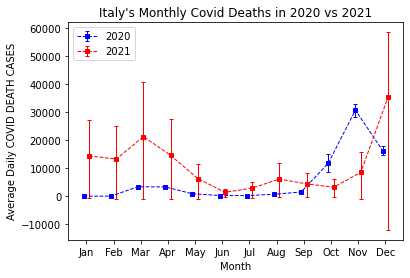

In [102]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err20, data=statsIT20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err21, data=statsIT21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID DEATH CASES")
plt.title("Italy's Monthly Covid Deaths in 2020 vs 2021")
plt.show()

*Similarly to the trend observed in the average Covid Cases graph, 2021 had a higher average of death cases than 2020. As Expected, during 2020's peak of covid-19 confirmed cases, the average daily covid deaths peaked too. The same trend appearead in December of 2021. However, the confidence interval of Dec 2021 is extremely wide, and that indicates possible instability and errors in the data collected. 2020's data have minimal to none error bars, which indicate a high accuracy of the data collected.*

## Computing Italy's Case fatality rate


In [103]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')


In [104]:
df['totcases'] = df.groupby(['iso3c'])['dcases'].cumsum()


In [105]:
df.loc[df['iso3c']=='ITA'].head(6)


,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,totcases
54199,2020-01-31,ITA,Italy,High income,Europe & Central Asia,Europe,2,0,60297396,Fri,Jan,2
54200,2020-02-01,ITA,Italy,High income,Europe & Central Asia,Europe,0,0,60297396,Sat,Feb,2
54201,2020-02-02,ITA,Italy,High income,Europe & Central Asia,Europe,0,0,60297396,Sun,Feb,2
54202,2020-02-03,ITA,Italy,High income,Europe & Central Asia,Europe,0,0,60297396,Mon,Feb,2
54203,2020-02-04,ITA,Italy,High income,Europe & Central Asia,Europe,0,0,60297396,Tue,Feb,2
54204,2020-02-05,ITA,Italy,High income,Europe & Central Asia,Europe,0,0,60297396,Wed,Feb,2


In [107]:
df['totdeaths'] = df.groupby(['iso3c'])['ddeaths'].cumsum()


In [108]:
df['totdeaths'].loc[df['iso3c']=='ITA']


54199         0
54200         0
54201         0
54202         0
54203         0
          ...  
54895    136784
54896    136986
54897    137122
54898    137278
54899    137433
Name: totdeaths, Length: 701, dtype: int64

In [109]:
df['cfr']=df['totdeaths']/df['totcases']


In [113]:
df_ita=df.loc[df['iso3c']=='ITA']


In [114]:
df_ita['date'] = pd.to_datetime(df_ita['date'],format='%Y-%m-%d')


C:\Users\h\AppData\Local\Temp/ipykernel_10496/212854159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ita['date'] = pd.to_datetime(df_ita['date'],format='%Y-%m-%d')


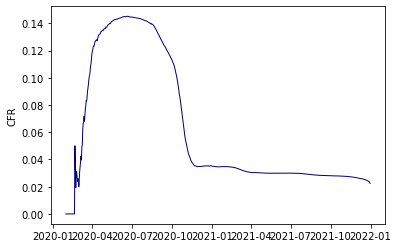

In [122]:
plt.plot( 'date', 'cfr', data=df_ita,  color='navy', markersize=5,     linewidth=1)
plt.xlabel("")
plt.ylabel("CFR")
plt.show()


The fatality rate graph has an expected curve in which it peaks then goes down but never reaches 0 again since the virus is still around. It is vivid that the fatality rate was at its peak in 2020 even though 2021 had more cases. However, 0.14 is a  fatality rate that concludes that 10% of the people who got covid did die in Italy, and that occured in Italy's peak time.


## **Comparison of Covid-19 in 2020 and 2021**

**1. Comparison In terms of region: confirmed COVID 19 cases**

**Region 1: Europe & Central Asia**

In [123]:
df['date'][0]

'2020-02-24'

In [124]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [125]:
df['date'][0]

Timestamp('2020-02-24 00:00:00')

In [126]:
df['year'] = pd. DatetimeIndex(df['date']). year

In [127]:
df['year'][0]

2020

In [128]:
df['region'].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America(region)'], dtype=object)

In [129]:
def ci_lb4(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [130]:
x=df['dcases']

In [131]:
ci_lb4(x)

2285.1835480837417

In [132]:
def ci_ub4(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [133]:
ci_ub4(x)

2422.2624439548763

In [134]:
rdcases=df.groupby(['region','year','month']).agg({"dcases": [np.mean, np.std, np.size,ci_ub4,ci_lb4]})

In [135]:
rdcases

dcases                                 \
                                      mean          std  size      ci_ub4   
region              year month                                              
East Asia & Pacific 2020 Apr     92.700000   177.828711   570  107.329764   
                         Aug    423.417657  1044.901057   589  507.976780   
                         Dec    630.715288  1475.101424   713  739.173912   
                         Feb    250.304795  1155.872616   292  383.435013   
                         Jan    126.679487   436.945076    78  225.195380   
...                                    ...          ...   ...         ...   
Sub-Saharan Africa  2021 Mar    161.274537   393.852860  1457  181.514676   
                         May    128.577213   488.161505  1457  153.663883   
                         Nov     89.737589   588.981229  1410  120.506577   
                         Oct     87.528483   293.259577  1457  102.599123   
                         Sep    247.950355  1021.166824  1410  301.297165   

                                            
                                    ci_lb4  
region              year month              
East Asia & Pacific 2020 Apr     78.070236  
                         Aug    338.858534  
                         Dec    522.256663  
                         Feb    117.174576  
                         Jan     28.163595  
...                                    ...  
Sub-Saharan Africa  2021 Mar    141.034398  
                         May    103.490544  
                         Nov     58.968601  
                         Oct     72.457843  
                         Sep    194.603545  

[166 rows x 5 columns]

In [136]:
rdcases=rdcases.reset_index()

In [137]:
statsR=rdcases[(rdcases['region']=='Europe & Central Asia ') & (rdcases['year']==2020)]

In [138]:
statsR

Empty DataFrame
Columns: [(region, ), (year, ), (month, ), (dcases, mean), (dcases, std), (dcases, size), (dcases, ci_ub4), (dcases, ci_lb4)]
Index: []

In [139]:
statsR.columns

MultiIndex([('region',       ''),
            (  'year',       ''),
            ( 'month',       ''),
            ('dcases',   'mean'),
            ('dcases',    'std'),
            ('dcases',   'size'),
            ('dcases', 'ci_ub4'),
            ('dcases', 'ci_lb4')],
           )

In [140]:
statsR21=rdcases[(rdcases['region']=='Europe & Central Asia')
  & (rdcases['year']==2021)]
statsR21

region  year month       dcases                      \
                                              mean           std  size   
36  Europe & Central Asia  2021   Apr  4400.757516   9911.409826  1530   
37  Europe & Central Asia  2021   Aug  3180.007590   6844.920329  1581   
38  Europe & Central Asia  2021   Dec  9411.908918  22368.523899  1581   
39  Europe & Central Asia  2021   Feb  3034.478291   5547.740717  1428   
40  Europe & Central Asia  2021   Jan  4423.700822   9236.689814  1581   
41  Europe & Central Asia  2021   Jul  2646.413662   7396.965106  1581   
42  Europe & Central Asia  2021   Jun  1075.566013   2875.930124  1530   
43  Europe & Central Asia  2021   Mar  4017.991145   6963.850364  1581   
44  Europe & Central Asia  2021   May  1864.763441   3692.159287  1581   
45  Europe & Central Asia  2021   Nov  6763.426144  11088.295989  1530   
46  Europe & Central Asia  2021   Oct  4243.963947   8383.799608  1581   
47  Europe & Central Asia  2021   Sep  3095.722222   6524.122498  1530   

                               
          ci_ub4       ci_lb4  
36   4897.786519  3903.728514  
37   3517.670508  2842.344672  
38  10515.358001  8308.459836  
39   3322.462489  2746.494094  
40   4879.350777  3968.050868  
41   3011.309191  2281.518133  
42   1219.785726   931.346300  
43   4361.520934  3674.461356  
44   2046.899276  1682.627606  
45   7319.472639  6207.379649  
46   4657.540454  3830.387440  
47   3422.888403  2768.556042

In [141]:
statsR20=rdcases[(rdcases['region']=='Europe & Central Asia')
  & (rdcases['year']==2020)]
statsR20

region  year month       dcases                      \
                                              mean           std  size   
24  Europe & Central Asia  2020   Apr   693.848667   1939.781037  1500   
25  Europe & Central Asia  2020   Aug   557.484503   1427.035570  1581   
26  Europe & Central Asia  2020   Dec  5276.588868  21992.213905  1581   
27  Europe & Central Asia  2020   Feb     4.819936     24.944837   311   
28  Europe & Central Asia  2020   Jan     0.894737      0.936586    19   
29  Europe & Central Asia  2020   Jul   398.997470   1080.452784  1581   
30  Europe & Central Asia  2020   Jun   351.989542   1137.680770  1530   
31  Europe & Central Asia  2020   Mar   338.220733   1065.272767  1418   
32  Europe & Central Asia  2020   May   424.242884   1403.684633  1581   
33  Europe & Central Asia  2020   Nov  5183.352288   9110.089031  1530   
34  Europe & Central Asia  2020   Oct  3193.193548   6395.982837  1581   
35  Europe & Central Asia  2020   Sep  1008.238562   2527.394697  1530   

                              
         ci_ub4       ci_lb4  
24   792.092653   595.604680  
25   627.880793   487.088214  
26  6361.474414  4191.703322  
27     7.603155     2.036716  
28     1.346157     0.443317  
29   452.296679   345.698261  
30   409.040996   294.938089  
31   393.714208   282.727259  
32   493.487262   354.998506  
33  5640.197332  4726.507243  
34  3508.710184  2877.676913  
35  1134.980215   881.496909

In [142]:
statsR20.columns=['region','year','month','mean','std','size','ci_lb4','ci_ub4']

In [143]:
statsR21.columns=['region','year','month','mean','std','size','ci_lb4','ci_ub4']

In [144]:
x=statsR20['region']
x

24    Europe & Central Asia
25    Europe & Central Asia
26    Europe & Central Asia
27    Europe & Central Asia
28    Europe & Central Asia
29    Europe & Central Asia
30    Europe & Central Asia
31    Europe & Central Asia
32    Europe & Central Asia
33    Europe & Central Asia
34    Europe & Central Asia
35    Europe & Central Asia
Name: region, dtype: object

In [145]:
y1=statsR20['mean']
y1

24     693.848667
25     557.484503
26    5276.588868
27       4.819936
28       0.894737
29     398.997470
30     351.989542
31     338.220733
32     424.242884
33    5183.352288
34    3193.193548
35    1008.238562
Name: mean, dtype: float64

In [146]:
y2=statsR21['mean']
y2

36    4400.757516
37    3180.007590
38    9411.908918
39    3034.478291
40    4423.700822
41    2646.413662
42    1075.566013
43    4017.991145
44    1864.763441
45    6763.426144
46    4243.963947
47    3095.722222
Name: mean, dtype: float64

In [147]:
ci_lb_ubR20=[statsR20['ci_lb4'],statsR20['ci_ub4']]
errR20 = np.abs(ci_lb_ubR20 - statsR20['mean'].to_numpy())

In [148]:
ci_lb_ubR21=[statsR21['ci_lb4'],statsR21['ci_ub4']]
errR21 = np.abs(ci_lb_ubR21 - statsR21['mean'].to_numpy())

In [149]:
from matplotlib.transforms import Affine2D

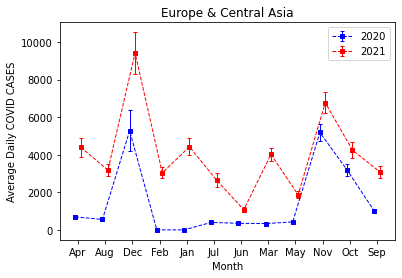

In [150]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=errR20, data=statsR20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=errR21, data=statsR21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Europe & Central Asia")
plt.show()

*Examining the graph of Avergae daily covid cases in Europe and Central Asia in 2020 vs 2021, it can be seen that both years suffered from an increasing average of covid cases. In 2020, covid cases kept gradually increasing throughout the whole year and a bigger increase was observed in October and onwards. On the other hand, 2021 is more fluctuating since the cases kept increasing and decreasing multiple times during the year. In june 2021, the cases were at their minimum, and after September 2021 the cases started booming and reached its highest in the 2 years in December 2021.*

**Region 2: Middle East and North Africa**

In [151]:
statsR2=rdcases[(rdcases['region']=='Middle East & North Africa') & (rdcases['year']==2020)]

In [152]:
statsR2

region  year month       dcases                    \
                                                   mean          std size   
71  Middle East & North Africa  2020   Apr   209.711755   416.318100  621   
72  Middle East & North Africa  2020   Aug   641.867896   894.732215  651   
73  Middle East & North Africa  2020   Dec  1273.310292  2001.556385  651   
74  Middle East & North Africa  2020   Feb     7.000000    26.790811  104   
75  Middle East & North Africa  2020   Jan     1.333333     2.309401    3   
76  Middle East & North Africa  2020   Jul   699.082949   889.344877  651   
77  Middle East & North Africa  2020   Jun   647.385714   954.622947  630   
78  Middle East & North Africa  2020   Mar   106.802583   387.634558  542   
79  Middle East & North Africa  2020   May   404.010753   637.407884  651   
80  Middle East & North Africa  2020   Nov  1582.941270  2690.395225  630   
81  Middle East & North Africa  2020   Oct  1124.852535  1487.973491  651   
82  Middle East & North Africa  2020   Sep   955.063492  1365.640403  630   

                              
         ci_ub4       ci_lb4  
71   242.519488   176.904023  
72   710.726798   573.008993  
73  1427.350768  1119.269816  
74    12.210144     1.789856  
75     7.070204    -4.403537  
76   767.527241   630.638658  
77   722.072912   572.698517  
78   139.509802    74.095364  
79   453.065885   354.955620  
80  1793.430740  1372.451799  
81  1239.367493  1010.337577  
82  1061.907618   848.219366

In [153]:
statsR2.columns

MultiIndex([('region',       ''),
            (  'year',       ''),
            ( 'month',       ''),
            ('dcases',   'mean'),
            ('dcases',    'std'),
            ('dcases',   'size'),
            ('dcases', 'ci_ub4'),
            ('dcases', 'ci_lb4')],
           )

In [154]:
statsR221=rdcases[(rdcases['region']=='Middle East & North Africa')
  & (rdcases['year']==2021)]
statsR221

region  year month       dcases                    \
                                                   mean          std size   
83  Middle East & North Africa  2021   Apr  2214.015873  4494.082227  630   
84  Middle East & North Africa  2021   Aug  3312.694316  7919.025055  651   
85  Middle East & North Africa  2021   Dec   672.032258  1064.245135  651   
86  Middle East & North Africa  2021   Feb  1405.054422  1954.685370  588   
87  Middle East & North Africa  2021   Jan  1402.342550  2059.496147  651   
88  Middle East & North Africa  2021   Jul  2359.718894  5094.053939  651   
89  Middle East & North Africa  2021   Jun  1296.085714  2302.221239  630   
90  Middle East & North Africa  2021   Mar  1714.384025  2338.872107  651   
91  Middle East & North Africa  2021   May  1409.675883  2994.057808  651   
92  Middle East & North Africa  2021   Nov   690.525397  1576.597451  630   
93  Middle East & North Africa  2021   Oct   964.829493  2616.431979  651   
94  Middle East & North Africa  2021   Sep  1978.706349  4665.790138  630   

                              
         ci_ub4       ci_lb4  
83  2565.621087  1862.410659  
84  3922.145242  2703.243391  
85   753.936934   590.127582  
86  1563.373290  1246.735554  
87  1560.842090  1243.843009  
88  2751.759059  1967.678729  
89  1476.205470  1115.965959  
90  1894.384436  1534.383613  
91  1640.099615  1179.252152  
92   813.874249   567.176545  
93  1166.191009   763.467977  
94  2343.745540  1613.667158

In [155]:
statsR220=rdcases[(rdcases['region']=='Middle East & North Africa')
  & (rdcases['year']==2020)]
statsR220

region  year month       dcases                    \
                                                   mean          std size   
71  Middle East & North Africa  2020   Apr   209.711755   416.318100  621   
72  Middle East & North Africa  2020   Aug   641.867896   894.732215  651   
73  Middle East & North Africa  2020   Dec  1273.310292  2001.556385  651   
74  Middle East & North Africa  2020   Feb     7.000000    26.790811  104   
75  Middle East & North Africa  2020   Jan     1.333333     2.309401    3   
76  Middle East & North Africa  2020   Jul   699.082949   889.344877  651   
77  Middle East & North Africa  2020   Jun   647.385714   954.622947  630   
78  Middle East & North Africa  2020   Mar   106.802583   387.634558  542   
79  Middle East & North Africa  2020   May   404.010753   637.407884  651   
80  Middle East & North Africa  2020   Nov  1582.941270  2690.395225  630   
81  Middle East & North Africa  2020   Oct  1124.852535  1487.973491  651   
82  Middle East & North Africa  2020   Sep   955.063492  1365.640403  630   

                              
         ci_ub4       ci_lb4  
71   242.519488   176.904023  
72   710.726798   573.008993  
73  1427.350768  1119.269816  
74    12.210144     1.789856  
75     7.070204    -4.403537  
76   767.527241   630.638658  
77   722.072912   572.698517  
78   139.509802    74.095364  
79   453.065885   354.955620  
80  1793.430740  1372.451799  
81  1239.367493  1010.337577  
82  1061.907618   848.219366

In [156]:
statsR220.columns=['region','year','month','mean','std','size','ci_lb4','ci_ub4']

In [157]:
statsR221.columns=['region','year','month','mean','std','size','ci_lb4','ci_ub4']

In [158]:
x=statsR220['region']
x

71    Middle East & North Africa
72    Middle East & North Africa
73    Middle East & North Africa
74    Middle East & North Africa
75    Middle East & North Africa
76    Middle East & North Africa
77    Middle East & North Africa
78    Middle East & North Africa
79    Middle East & North Africa
80    Middle East & North Africa
81    Middle East & North Africa
82    Middle East & North Africa
Name: region, dtype: object

In [159]:
y1=statsR220['mean']
y1

71     209.711755
72     641.867896
73    1273.310292
74       7.000000
75       1.333333
76     699.082949
77     647.385714
78     106.802583
79     404.010753
80    1582.941270
81    1124.852535
82     955.063492
Name: mean, dtype: float64

In [160]:
y2=statsR221['mean']
y2

83    2214.015873
84    3312.694316
85     672.032258
86    1405.054422
87    1402.342550
88    2359.718894
89    1296.085714
90    1714.384025
91    1409.675883
92     690.525397
93     964.829493
94    1978.706349
Name: mean, dtype: float64

In [161]:
ci_lb_ubR220=[statsR220['ci_lb4'],statsR220['ci_ub4']]
errR220 = np.abs(ci_lb_ubR220 - statsR220['mean'].to_numpy())

In [162]:
ci_lb_ubR221=[statsR221['ci_lb4'],statsR221['ci_ub4']]
errR221 = np.abs(ci_lb_ubR221 - statsR221['mean'].to_numpy())

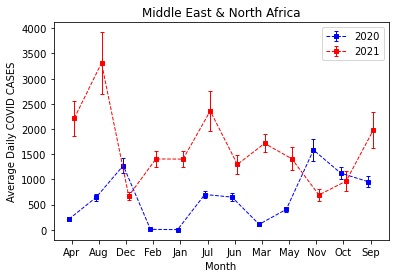

In [163]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=errR220, data=statsR220,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=errR221, data=statsR221,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Middle East & North Africa")
plt.show()

*Examining 2020's trend, the cases were gradually increasing throughout the year and peaked in November, then decreased in December. However, 2021 cases were fluctuating and there was no clear trend in the data. The cases peaked in August 2021 then a sharp decrease in cases was observed. August 2021 have significantly wide error bars that indicate the high probability of containing errors.*

**Comparison in terms of income and confirmed COVID 19 deaths**

**Lower Middle Income**

In [164]:
df['date'][0]

Timestamp('2020-02-24 00:00:00')

In [165]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [166]:
df['date'][0]

Timestamp('2020-02-24 00:00:00')

In [167]:
df['year'] = pd. DatetimeIndex(df['date']). year

In [168]:
df['income'].unique()

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income'], dtype=object)

In [169]:
x=df['ddeaths']

In [170]:
def ci_lb5(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [171]:
ci_lb5(x)

43.18608989544067

In [172]:
def ci_ub5(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [173]:
ci_ub5(x)

45.399958963672184

In [174]:
incdeaths=df.groupby(['income','year','month']).agg({"ddeaths": [np.mean, np.std, np.size,ci_ub5,ci_lb5]})

In [175]:
incdeaths

ddeaths                                \
                                      mean         std  size      ci_ub5   
income              year month                                             
High income         2020 Apr     98.662573  318.565638  1710  113.772301   
                         Aug     21.320883  132.611288  1767   27.508281   
                         Dec    114.995473  379.800723  1767  132.716274   
                         Feb      0.108268    0.597571   508    0.160356   
                         Jan      0.000000    0.000000    75    0.000000   
...                                    ...         ...   ...         ...   
Upper middle income 2021 Mar     93.728196  337.437017  1674  109.904429   
                         May     96.706691  295.246678  1674  110.860381   
                         Nov     56.883951  171.705193  1620   65.251510   
                         Oct     61.903226  160.512807  1674   69.597973   
                         Sep     81.536420  176.995456  1620   90.161785   

                                           
                                   ci_lb5  
income              year month             
High income         2020 Apr    83.552845  
                         Aug    15.133485  
                         Dec    97.274671  
                         Feb     0.056179  
                         Jan     0.000000  
...                                   ...  
Upper middle income 2021 Mar    77.551963  
                         May    82.553000  
                         Nov    48.516391  
                         Oct    54.208478  
                         Sep    72.911054  

[96 rows x 5 columns]

In [176]:
incdeaths=incdeaths.reset_index()

In [177]:
incdeaths

income  year month     ddeaths                                \
                                           mean         std  size      ci_ub5   
0           High income  2020   Apr   98.662573  318.565638  1710  113.772301   
1           High income  2020   Aug   21.320883  132.611288  1767   27.508281   
2           High income  2020   Dec  114.995473  379.800723  1767  132.716274   
3           High income  2020   Feb    0.108268    0.597571   508    0.160356   
4           High income  2020   Jan    0.000000    0.000000    75    0.000000   
..                  ...   ...   ...         ...         ...   ...         ...   
91  Upper middle income  2021   Mar   93.728196  337.437017  1674  109.904429   
92  Upper middle income  2021   May   96.706691  295.246678  1674  110.860381   
93  Upper middle income  2021   Nov   56.883951  171.705193  1620   65.251510   
94  Upper middle income  2021   Oct   61.903226  160.512807  1674   69.597973   
95  Upper middle income  2021   Sep   81.536420  176.995456  1620   90.161785   

               
       ci_lb5  
0   83.552845  
1   15.133485  
2   97.274671  
3    0.056179  
4    0.000000  
..        ...  
91  77.551963  
92  82.553000  
93  48.516391  
94  54.208478  
95  72.911054  

[96 rows x 8 columns]

In [178]:
statsI=incdeaths[(incdeaths['income']==' Lower middle income') & (incdeaths['year']==2020)]

In [179]:
statsI.columns

MultiIndex([( 'income',       ''),
            (   'year',       ''),
            (  'month',       ''),
            ('ddeaths',   'mean'),
            ('ddeaths',    'std'),
            ('ddeaths',   'size'),
            ('ddeaths', 'ci_ub5'),
            ('ddeaths', 'ci_lb5')],
           )

In [180]:
statsI21=incdeaths[(incdeaths['income']=='Lower middle income')
  & (incdeaths['year']==2021)]
statsI21

income  year month     ddeaths                                \
                                           mean         std  size      ci_ub5   
60  Lower middle income  2021   Apr   61.694815  290.407758  1350   77.200082   
61  Lower middle income  2021   Aug   68.870266  210.643427  1426   79.812482   
62  Lower middle income  2021   Dec   27.176718  112.677461  1426   33.029932   
63  Lower middle income  2021   Feb   18.553968   42.053422  1260   20.878213   
64  Lower middle income  2021   Jan   23.284588   52.762944  1395   26.055784   
65  Lower middle income  2021   Jul   64.838710  235.585459  1426   77.076580   
66  Lower middle income  2021   Jun   68.369565  381.717385  1380   88.526841   
67  Lower middle income  2021   Mar   19.689606   51.783310  1395   22.409350   
68  Lower middle income  2021   May  105.464159  569.973755  1409  135.250760   
69  Lower middle income  2021   Nov   32.799275  113.270292  1380   38.780718   
70  Lower middle income  2021   Oct   28.604488   86.738223  1426   33.110246   
71  Lower middle income  2021   Sep   35.465942   87.992029  1380   40.112520   

               
       ci_lb5  
60  46.189548  
61  57.928051  
62  21.323504  
63  16.229723  
64  20.513392  
65  52.600839  
66  48.212290  
67  16.969862  
68  75.677558  
69  26.817833  
70  24.098730  
71  30.819364

In [181]:
statsI20=incdeaths[(incdeaths['income']=='Lower middle income')
  & (incdeaths['year']==2020)]
statsI20

income  year month    ddeaths                               \
                                          mean         std  size     ci_ub5   
48  Lower middle income  2020   Apr   3.291191    8.492063  1226   3.767014   
49  Lower middle income  2020   Aug  30.777194  140.381582  1333  38.320087   
50  Lower middle income  2020   Dec  24.962724   67.862191  1395  28.526957   
51  Lower middle income  2020   Feb   0.007194    0.084819   139   0.021419   
52  Lower middle income  2020   Jan   0.000000    0.000000    18   0.000000   
53  Lower middle income  2020   Jul  25.108027   98.432430  1333  30.396935   
54  Lower middle income  2020   Jun  17.723256   77.938291  1290  21.980339   
55  Lower middle income  2020   Mar   0.532143    1.842141   840   0.656898   
56  Lower middle income  2020   May   7.261923   23.121114  1321   8.509892   
57  Lower middle income  2020   Nov  26.042506   83.133271  1341  30.496001   
58  Lower middle income  2020   Oct  28.715447  117.966352  1353  35.006833   
59  Lower middle income  2020   Sep  37.388372  174.349485  1290  46.911550   

               
       ci_lb5  
48   2.815368  
49  23.234301  
50  21.398491  
51  -0.007031  
52   0.000000  
53  19.819119  
54  13.466173  
55   0.407388  
56   6.013954  
57  21.589010  
58  22.424061  
59  27.865194

In [182]:
statsI20.columns=['income','year','month','mean','std','size','ci_lb5','ci_ub5']

In [183]:
statsI21.columns=['income','year','month','mean','std','size','ci_lb5','ci_ub5']

In [184]:
x=statsI20['income']
x

48    Lower middle income
49    Lower middle income
50    Lower middle income
51    Lower middle income
52    Lower middle income
53    Lower middle income
54    Lower middle income
55    Lower middle income
56    Lower middle income
57    Lower middle income
58    Lower middle income
59    Lower middle income
Name: income, dtype: object

In [185]:
y1=statsI20['mean']
y1

48     3.291191
49    30.777194
50    24.962724
51     0.007194
52     0.000000
53    25.108027
54    17.723256
55     0.532143
56     7.261923
57    26.042506
58    28.715447
59    37.388372
Name: mean, dtype: float64

In [186]:
y2=statsI21['mean']
y2

60     61.694815
61     68.870266
62     27.176718
63     18.553968
64     23.284588
65     64.838710
66     68.369565
67     19.689606
68    105.464159
69     32.799275
70     28.604488
71     35.465942
Name: mean, dtype: float64

In [187]:
ci_lb_ubI20=[statsI20['ci_lb5'],statsI20['ci_ub5']]
errI20 = np.abs(ci_lb_ubI20 - statsI20['mean'].to_numpy())

In [188]:
ci_lb_ubI21=[statsI21['ci_lb5'],statsI21['ci_ub5']]
errI21 = np.abs(ci_lb_ubI21 - statsI21['mean'].to_numpy())

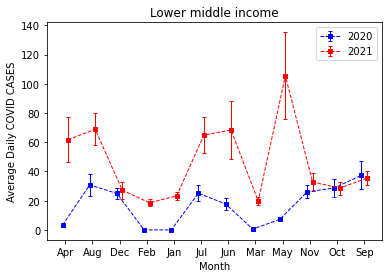

In [189]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=errI20, data=statsI20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=errI21, data=statsI21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Lower middle income")
plt.show()

*The lower middle income class suffered more in 2021 than in 2020, and that is vivid in the number of average daily cases. 2020's cases were gradually increasing and started to gradually drop from September and later on. However, 2021 had more fluctuation from high to low averages, and Cases peaked in May 2021.*

**Upper middle income**

In [190]:
statsI220=incdeaths[(incdeaths['income']=='Upper middle income') & (incdeaths['year']==2020)]

In [191]:
statsI221=incdeaths[(incdeaths['income']=='Upper middle income')
  & (incdeaths['year']==2021)]
statsI221

income  year month     ddeaths                                \
                                           mean         std  size      ci_ub5   
84  Upper middle income  2021   Apr  120.103086  411.445821  1620  140.153717   
85  Upper middle income  2021   Aug   90.756870  197.318167  1674  100.216012   
86  Upper middle income  2021   Dec   42.937276  148.318079  1674   50.047426   
87  Upper middle income  2021   Feb   80.735450  238.265359  1512   92.754804   
88  Upper middle income  2021   Jan   85.315412  230.584674  1674   96.369301   
89  Upper middle income  2021   Jul   90.015532  307.556616  1674  104.759342   
90  Upper middle income  2021   Jun   94.161111  307.070283  1620  109.125300   
91  Upper middle income  2021   Mar   93.728196  337.437017  1674  109.904429   
92  Upper middle income  2021   May   96.706691  295.246678  1674  110.860381   
93  Upper middle income  2021   Nov   56.883951  171.705193  1620   65.251510   
94  Upper middle income  2021   Oct   61.903226  160.512807  1674   69.597973   
95  Upper middle income  2021   Sep   81.536420  176.995456  1620   90.161785   

                
        ci_lb5  
84  100.052456  
85   81.297728  
86   35.827126  
87   68.716096  
88   74.261523  
89   75.271721  
90   79.196923  
91   77.551963  
92   82.553000  
93   48.516391  
94   54.208478  
95   72.911054

In [192]:
statsI220.columns=['income','year','month','mean','std','size','ci_lb5','ci_ub5']

In [193]:
statsI221.columns=['income','year','month','mean','std','size','ci_lb5','ci_ub5']

In [194]:
x=statsI220['income']

In [195]:
y1=statsI220['mean']

In [196]:
y2=statsI221['mean']

In [197]:
ci_lb_ubI220=[statsI220['ci_lb5'],statsI220['ci_ub5']]
errI220 = np.abs(ci_lb_ubI220 - statsI220['mean'].to_numpy())

In [198]:
ci_lb_ubI221=[statsI221['ci_lb5'],statsI221['ci_ub5']]
errI221 = np.abs(ci_lb_ubI221 - statsI221['mean'].to_numpy())

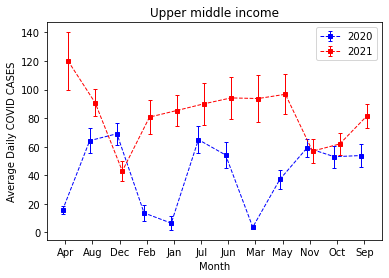

In [199]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=errI220, data=statsI220,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=errI221, data=statsI221,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Upper middle income")
plt.show()

*The upper middle income population had similar averages in both years from July until December. Contrastingly, the start of 2021 was very different than the start of 2020. 2021 decreased before July whereas 2020 was increaing. Both years intersect in November, where they have the same number of Cases.*

## **Comparing Continents in terms of confirmed COVID 19 cases**

**Continent 1: Africa**

In [200]:
df['continent'].unique()

array(['Asia', 'Africa', 'Europe', 'South America(continent)',
       'North America(continent)', 'Oceania'], dtype=object)

In [201]:
x=df['dcases']

In [202]:
def ci_lb6(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [203]:
ci_lb6(x)

2285.1835480837417

In [204]:
def ci_ub6(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [205]:
ci_ub6(x)

2422.2624439548763

In [206]:
contcases=df.groupby(['continent','year','month']).agg({"dcases": [np.mean, np.std, np.size,ci_ub6,ci_lb6]})

In [207]:
contcases=contcases.reset_index()

In [208]:
statsC21=contcases[(contcases['continent']=='Africa')
  & (contcases['year']==2021)]
statsC21

continent  year month      dcases                                 \
                                mean          std  size      ci_ub6   
11    Africa  2021   Apr  213.859748   517.379023  1590  239.309836   
12    Africa  2021   Aug  657.917225  1988.648676  1643  754.146589   
13    Africa  2021   Dec  650.332928  2476.930717  1643  770.189930   
14    Africa  2021   Feb  220.328841   415.200449  1484  241.470718   
15    Africa  2021   Jan  491.986001  1905.282764  1643  584.181346   
16    Africa  2021   Jul  732.982349  2411.828071  1643  849.689079   
17    Africa  2021   Jun  416.520126  1607.801075  1590  495.608523   
18    Africa  2021   Mar  194.475350   399.609813  1643  213.812199   
19    Africa  2021   May  171.797322   502.644840  1643  196.119966   
20    Africa  2021   Nov  114.522642   572.546433  1590  142.686436   
21    Africa  2021   Oct  117.874011   309.180289  1643  132.835036   
22    Africa  2021   Sep  327.310692  1067.995962  1590  379.845853   

                
        ci_lb6  
11  188.409661  
12  561.687860  
13  530.475925  
14  199.186964  
15  399.790656  
16  616.275620  
17  337.431729  
18  175.138501  
19  147.474678  
20   86.358847  
21  102.912986  
22  274.775531

In [209]:
statsC20=contcases[(contcases['continent']=='Africa')
  & (contcases['year']==2020)]
statsC20

continent  year month      dcases                                 \
                                mean          std  size      ci_ub6   
0     Africa  2020   Apr   21.675871    47.034430  1521   24.041493   
1     Africa  2020   Aug  197.329884   704.490346  1643  231.419696   
2     Africa  2020   Dec  356.315277  1350.848871  1643  421.681940   
3     Africa  2020   Feb    0.130435     0.344350    23    0.279343   
4     Africa  2020   Jul  318.388923  1529.184505  1643  392.385127   
5     Africa  2020   Jun  162.374843   613.492061  1590  192.552770   
6     Africa  2020   Mar    7.053988    19.438419   815    8.390511   
7     Africa  2020   May   66.293072   174.256499  1631   74.756235   
8     Africa  2020   Nov  244.483019   738.751318  1590  280.822500   
9     Africa  2020   Oct  184.696896   567.755732  1643  212.170212   
10    Africa  2020   Sep  144.430189   386.168275  1590  163.425965   

                
        ci_lb6  
0    19.310249  
1   163.240073  
2   290.948613  
3    -0.018473  
4   244.392718  
5   132.196916  
6     5.717465  
7    57.829909  
8   208.143537  
9   157.223580  
10  125.434412

In [210]:
statsC20.columns=['continent','year','month','mean','std','size','ci_lb6','ci_ub6']

In [211]:
statsC21.columns=['continent','year','month','mean','std','size','ci_lb6','ci_ub6']

In [212]:
x=statsC20['continent']
x

0     Africa
1     Africa
2     Africa
3     Africa
4     Africa
5     Africa
6     Africa
7     Africa
8     Africa
9     Africa
10    Africa
Name: continent, dtype: object

In [213]:
y1=statsC20['mean']
y1

0      21.675871
1     197.329884
2     356.315277
3       0.130435
4     318.388923
5     162.374843
6       7.053988
7      66.293072
8     244.483019
9     184.696896
10    144.430189
Name: mean, dtype: float64

In [214]:
y2=statsC21['mean']
y2

11    213.859748
12    657.917225
13    650.332928
14    220.328841
15    491.986001
16    732.982349
17    416.520126
18    194.475350
19    171.797322
20    114.522642
21    117.874011
22    327.310692
Name: mean, dtype: float64

In [215]:
ci_lb_ubC20=[statsC20['ci_lb6'],statsC20['ci_ub6']]
errC20 = np.abs(ci_lb_ubC20 - statsC20['mean'].to_numpy())

In [216]:
ci_lb_ubC21=[statsC21['ci_lb6'],statsC21['ci_ub6']]
errC21 = np.abs(ci_lb_ubC21 - statsC21['mean'].to_numpy())

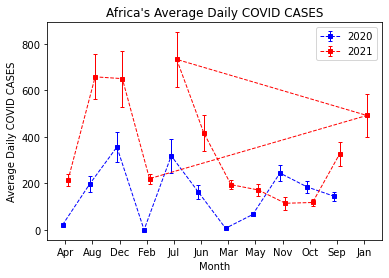

In [217]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=errC20, data=statsC20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=errC21, data=statsC21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Africa's Average Daily COVID CASES")
plt.show()

*Africa's average daily cases in 2020 had a different trend than in 2021. In 2020, Africa didn't suffer as much as it did in 2021 in terms of cases. In 2021 the cases reached 600+ whereas the highest number of cases in 2020 was approx 350. This shows that covid struck Africa more violently in 2021 than in 2020. 2021 also had more fluctuation than 2020.*

**Continent 2: Europe**

In [218]:
statsC221=contcases[(contcases['continent']=='Europe')
  & (contcases['year']==2021)]
statsC221

continent  year month        dcases                                    \
                                  mean           std  size        ci_ub6   
59    Europe  2021   Apr   3882.789922   7984.927128  1290   4318.936208   
60    Europe  2021   Aug   2896.221305   6796.809360  1333   3261.423109   
61    Europe  2021   Dec  10521.554389  23984.334327  1333  11810.265267   
62    Europe  2021   Feb   3370.627076   5876.172663  1204   3702.878279   
63    Europe  2021   Jan   4974.927982   9883.362427  1333   5505.974477   
64    Europe  2021   Jul   2644.664666   7673.031751  1333   3056.947090   
65    Europe  2021   Jun   1061.393798   3027.147988  1290   1226.740248   
66    Europe  2021   Mar   4226.169542   6925.883241  1333   4598.306661   
67    Europe  2021   May   1778.587397   3377.861190  1333   1960.084469   
68    Europe  2021   Nov   7224.170543  11493.930719  1290   7851.982808   
69    Europe  2021   Oct   4167.192798   8245.780023  1333   4610.249765   
70    Europe  2021   Sep   2872.321705   6136.287433  1290   3207.493076   

                 
         ci_lb6  
59  3446.643637  
60  2531.019501  
61  9232.843510  
62  3038.375874  
63  4443.881487  
64  2232.382242  
65   896.047349  
66  3854.032423  
67  1597.090325  
68  6596.358277  
69  3724.135831  
70  2537.150335

In [219]:
statsC220=contcases[(contcases['continent']=='Europe')
  & (contcases['year']==2020)]
statsC220

continent  year month       dcases                                  \
                                 mean          std  size       ci_ub6   
47    Europe  2020   Apr   716.859690  2026.953638  1290   827.574326   
48    Europe  2020   Aug   574.078770  1526.829653  1333   656.117402   
49    Europe  2020   Dec  4883.578395  7650.466032  1333  5294.648332   
50    Europe  2020   Feb     4.879479    25.101789   307     7.698541   
51    Europe  2020   Jan     0.894737     0.936586    19     1.346157   
52    Europe  2020   Jul   342.822206   978.006769  1333   395.371838   
53    Europe  2020   Jun   350.358915  1227.591513  1290   417.411434   
54    Europe  2020   Mar   369.486078  1120.091160  1257   431.466215   
55    Europe  2020   May   451.645911  1513.905248  1333   532.990098   
56    Europe  2020   Nov  5744.452713  9583.968860  1290  6267.940574   
57    Europe  2020   Oct  3655.168792  6861.235403  1333  4023.832295   
58    Europe  2020   Sep  1124.893023  2728.262523  1290  1273.913991   

                 
         ci_lb6  
47   606.145054  
48   492.040137  
49  4472.508458  
50     2.060416  
51     0.443317  
52   290.272573  
53   283.306396  
54   307.505941  
55   370.301725  
56  5220.964852  
57  3286.505289  
58   975.872056

In [220]:
statsC220.columns=['continent','year','month','mean','std','size','ci_lb6','ci_ub6']

In [221]:
statsC221.columns=['continent','year','month','mean','std','size','ci_lb6','ci_ub6']

In [222]:
x=statsC220['continent']
x

47    Europe
48    Europe
49    Europe
50    Europe
51    Europe
52    Europe
53    Europe
54    Europe
55    Europe
56    Europe
57    Europe
58    Europe
Name: continent, dtype: object

In [223]:
y1=statsC220['mean']
y1

47     716.859690
48     574.078770
49    4883.578395
50       4.879479
51       0.894737
52     342.822206
53     350.358915
54     369.486078
55     451.645911
56    5744.452713
57    3655.168792
58    1124.893023
Name: mean, dtype: float64

In [224]:
y2=statsC221['mean']
y2

59     3882.789922
60     2896.221305
61    10521.554389
62     3370.627076
63     4974.927982
64     2644.664666
65     1061.393798
66     4226.169542
67     1778.587397
68     7224.170543
69     4167.192798
70     2872.321705
Name: mean, dtype: float64

In [225]:
ci_lb_ubC220=[statsC220['ci_lb6'],statsC220['ci_ub6']]
errC220 = np.abs(ci_lb_ubC220 - statsC220['mean'].to_numpy())

In [226]:
ci_lb_ubC221=[statsC221['ci_lb6'],statsC221['ci_ub6']]
errC221 = np.abs(ci_lb_ubC221 - statsC221['mean'].to_numpy())

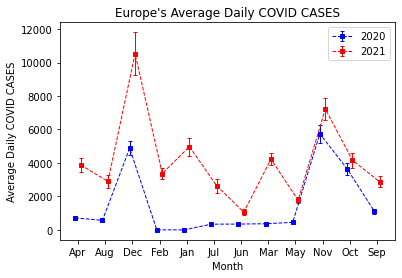

In [227]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=errC220, data=statsC220,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=errC221, data=statsC221,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("Europe's Average Daily COVID CASES")
plt.show()

*Europe's Average Daily covid cases had different trends in 2020 and 2021. In 2020, the average was very low in comparison to 2021's numbers until October 2020 where cases started reaching a worrying average. In 2021, the average in January was already higher than the majority of the months' averages. The cases started booming from October 2021 and reached 10,000 daily cases in December.*

## **Discussion and Conclusion**

**Part 1: Analysis of Covid Cases and reported deaths in Italy based on WEEKDAYS**

Closely examining the graphs and numbers obtained, it has been concluded that looking at a virus such as covid-19 in terms of daily cases and identifying the day that has the highest reported cases is not the *optimum* approach. Since covid-19 symptoms take up to more than 10 days to start appearing on a person, maybe someone caught covid on a Monday but showed covid symptoms on a Friday, so his case was reported and reflected on Friday's cases even though he didn't catch covid that day. The graph shows that Monday is the lowest day in terms of reported covid cases, where-as sunday reported the least death cases. It is suggested to examine the cases monthly or daily but not based on weekdays. Weekdays could be a solution for a virus that has symptoms that appear on the same day, but this is not the case for Covid-19.

**Part 2: Analysis of Covid cases and reported deaths in Italy in 2020 vs 2021**

As seen in the graphs above, Italy suffered in 2021's covid wave more than 2020. Despite that, both years reached the same peak of covid cases per month at approx 30,000 cases. The numbers in the first 2 quarters of 2020 were very low and didn't exceed the 5,000 cases per month, there were even months with 600 cases or fewer. On the other hand, 2021 struck italy more violently and had a fluctuating trend. Approaching summer 2021, the cases sarted to sharply drop to 2020's numbers, however it boomed in December 2021 and reached a very high number of covid cases (30,000). As for Deaths, 2020 also had very minimal deaths in the whole year except for the Peaked month of November. As for 2021, the deaths were greater in quantity, which is expected since the cases were greater than 2020. Surely when the number of cases increase, the deaths will coresspondingly increase. 

**Part 3: Comparing Europe and Central Asia to Middle East and North Africa covid cases in 2020 vs 2021**

Starting with 2020, the middle east generally suffered less than Europe. As for the middle east, the biggest average of cases per month was Approx 1,000 case. However, Europe reached an average of 4,000+ cases per month. Statistically speaking, this is expected since Europe has a more diverse population and people from around the world travel more frequently to Europe than the middle east. As for 2021, the same trend was seen, the middle east had way lower number of cases than Europe. The maximum average of Europe's cases was 8,000 case, and the middle east's max average was 4,000, which is half the number.

**Part 4: Comparing income levels with covid-19**

Covid 19 struck the poor and the rich countries without discriminating between them. The graphs show no significant differenc between both income levels, which was expected since both income levels are in the "middle" sector. Both income levels' peaks were very close to each other in terms of number of cases, which reassures the conclusion that there is no siginifcant difference in the struggle between income levels. Surely 2021 was worse for both income levels, while 2020 had fewer cases.

**Part 5: Comparing between Africa and Europe in terms of Covid Cases in 2020 vs 2021**

Generally Speaking, Europe suffered way more than Africa. This is surely the case due to the constant flights that are either returning or departuirng from Europe. Africa has less airplanes hence less travel and contact between different people from different populations. As a result of that, Africa's numbers were between 0-800 cases per month whereas Europe's cases were between 0-12,000 case. The difference is huge and is greatly significant, and expected too. 2021 struck both continents harder than 2020, especially Africa which had fluctuating trend in 2021. As for Europe, the cases peaked in December 2021. On the other hand, Africa peaked in July 2021.